# Clasificacion KNN
`El objetivo de este Notebook es de ver en accion el algoritmo KNN`<br>

**Nota:** Este notebook no le explica exatamente como funciona el algoritmo. Estoy partiendo de la premisa de que usted ya tiene este conocimiento pero lo desea ver la practica.

**Ator:** Bento Cussei

## Intro

- **Problema:** *Prevision de digitos escritos a mano del dataset digits de `sklearn`.*<br>
- **Tipo de clasificacion:** *Clasificacion Multiclase.*<br>
- **Clases:** *Digitos del `0` a `9`, un total de `10 clases`.*<br>
- **Dataset:** http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html<br>

En la celda de abajo veremos los digitos y sus  clases, que por cierto coinciden.

[//]: **`Digitos:`**<br>
[//]: <img src="images/digitos.png" alt="Digitos" width="450" height="350">

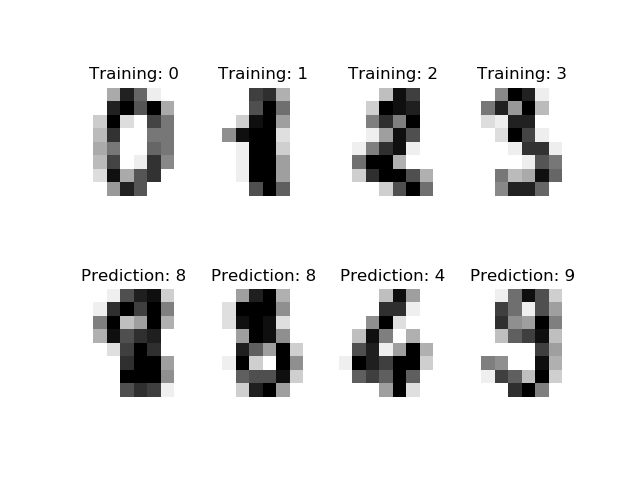

In [1]:
# Digitos

from IPython.display import Image
Image('images/digitos.png')

## Cargando las librerias necesarias
Nota que es necesario tener instalado `numpy`, `scikit-learn` y `matplotlib`

In [2]:
# Tener python y pip o anaconda o miniconda instalado

# Instalar las librerias

# !pip install numpy
# !pip install matplotlib
# !pip install -U scikit-learn

In [3]:
# Cargar las librerias

import numpy as np # El famoso paquete numeric python, con ella trabajaremos las matrices y vectores
from sklearn import datasets # datasets de sklearn
from sklearn.metrics import confusion_matrix # Esta matriz nos ayudaran a analisar el desempeno del modelo, 
#es una metrica de validacion
from sklearn.model_selection import train_test_split # Para dividir el dataset en una porcion para treino y otra para test
from sklearn.neighbors import KNeighborsClassifier # El algoritmo de KNN de sklearn ya implementado 
from sklearn.metrics import classification_report # Otra metrica de validacion del aprendizado del modelo
import matplotlib.pyplot as plt # Para graficar
import warnings
warnings.filterwarnings('ignore') # Para evitar que salten las advertencias que ponen los desarroladores

## Cargando y Explorando el Dataset

Antes de cargar el dataset entienda que:

Una imagen no es mas que una matriz con valores que representan cada pixel de la misma.<br>

Estaremos trabajando con imagenes negro y blaco (un unico canal). Imagenes de color pueden tener 3 o mas canales dependiendo del patron que se esta a usar, por ejemplo RGB tiene 3 canales.<br>

Si visitas el link del dataset, veras que las imagenes son de 8x8, lo que quiere decir que cada imagen del dataset tiene una dimension de 64 (64 pixels). Por cierto, 8x8 significa la imagen tiene 8 pixels de altura y 8 pixels de largura. Sin embargo el algoritmo KNN trabaja con una sola dimension (trabaja con vectores), lo quiere decir que necesitamos hacer una transformacion de la matriz. Para ser mas claro, tranformaremos las matrices en vectores. Vea la siguiente imagen para mejor compreesion<br>


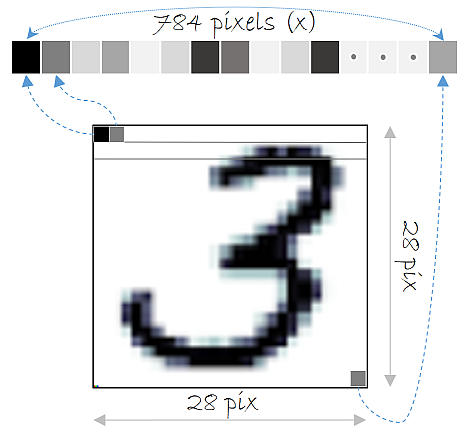

In [4]:
# Necesitaremos hacer flatten de cada matriz
# Recogemos cada pixel de la imagen por fila y los colocaremos en un vector
# Entienda:
from IPython.display import Image
Image('images/flatten.png')

In [5]:
# Ahora si, cargamos el dataset
digitos = datasets.load_digits()

In [6]:
# Veamos lo que tenemos en el dataset
digitos['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

Y sí, estas son las imagenes. Si estás acompañando el notebook desde el principio, entonces te acordais que dije que una imagen no es más que una matriz de pixeles, y los pixeles son representados en numeros. Como tenemos imagenes en negro y blanco solo tenemos un numero representando el pixel. Sí, 0 seria un pixel en lanco. Cuanto mayor el numero más negro es el pixel.<br>

Para que veas sí son imagenes, en la siguiente celda vamos visualizar algunas matrices en su representación grafica, y tambien veremos sus `labels`.<br>

`label`: es la clase en que pertenece la imagen. Ustedes estaran de acuerdo conmigo que es nuetra variable target.

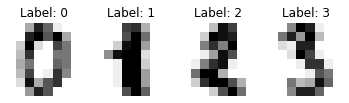

In [7]:
# Visualizando algunas imagenes y sus labels
images_and_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap= plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')

`Estos son numeros digitados a mano, que fueron procesados y entonces les pusieron sus tags, es decir las clases, que estaa demas decir que coincide con el numero.`<br>

Ahora vamos entonces separar lo que son los targets\clases y las imagenes en si. Sigue en la siguiente celda.

In [8]:
# Vamos a generar X y Y
# X para los datos
# Y para las clases
DATA = digitos.data
TARGET = digitos.target

In [9]:
# Veamos el formato que tienen las dos variables 
print(DATA.shape, TARGET.shape)

(1797, 64) (1797,)


Pongamos un freno aqui y entendamos lo siguiente:<br>

**Podemos ver que el shape de los datos es de (1797,64), pero que significa?**<br>

* `1797` es la cantidad de registro (filas)
* `64` es la cantidad de variables, o sea, la cantidad de pixeles, que es igual a la dimension de la imagen. Sii, cada pixel represena una variable. Tambien podemos decir que tenemos 1797 imagenes de 64 pixeles.

**Que decir del shape del target/clase?**<br>

* Vemos que es un vector columna con `1797` registros/elementos, la misma cantidad de registro de `DATA`, lo quiere decir que todas las imagenes tienes asignada una clase.

## Pre-Procesamiento y Normalizacion

**Por que dividimos el dataset en datos para entrenar y testear el modelo?**<br>

La respuesta es simples pero muy importante `para verificar si el modelo aprendio bien`.<br>

La division maas comun del dataset es:<br>
- `70%` para datos de entreno
- `30%` para datos de teste

In [10]:
# Division del dataset en datos de entreno y de teste
# label = target
train_data, test_data, train_label, test_labels = train_test_split(DATA, TARGET, test_size=0.30, random_state=101)

Ademas del train y test data tambien estaa el validation data. Este sirve para `validar el modelo en el proceso de entreinamiento, antes de testar el modelo con los datos de teste`.<br>

Nosotros estamos trabajando con un dataset muy pequenno, pero en otras ocasiones se trabajada con muchos datos y lleva dias hasta semanas para entrenar el modelo, y muchas de las veces los parametros necesitan ser ajustado porque el modelo no llego a la acuracia que deseamos. Si no validamos el modelo en el proceso de entrenamiento volveremos pasariamos por el mismo proceso, que ya dijimos que puede llevar dias.<br>

Alli entran los datos de validacion, una porcion pequenna para ir validando el modelo. Lo sacamos del train y test data<br>

La division maas comun del dataset en este caso es:<br>
- `70%` para entreno
- `10%` para validacion
- `20%` para teste. O podemos mantener test data en 30%

In [11]:
# Division de los datos de entreno en datos de entreno y validacion
TRAIN_DATA, VALID_DATA, TRAIN_LABELS, VALID_LABELS = train_test_split(train_data, train_label, test_size=0.1, random_state=84)

In [12]:
print(f"Registros de Entreno: {len(TRAIN_LABELS)}")
print(f"Registros de Validacion: {len(VALID_LABELS)}")
print(f"Registros de Teste: {len(test_labels)}")

Registros de Entreno: 1131
Registros de Validacion: 126
Registros de Teste: 540


**Ahora vamos normalizar los datos usando la media**

In [13]:
# Normalizacion de los datos por la media

# Calculo de la media del dataset
data_norm = np.mean(DATA, axis=0)

# Normalizando los datos
train_data_norm = TRAIN_DATA - data_norm
valid_data_norm = VALID_DATA - data_norm
test_data_norm = test_data - data_norm

In [14]:
# Shape de los datasets

print(train_data_norm.shape, valid_data_norm.shape, test_data_norm.shape)

(1131, 64) (126, 64) (540, 64)


## Buscando el Mejor Valor de K

In [15]:
# Range de valores de K que iremos testar
# Estamos tomando solo los valore impares de 1 a 30, 
# porque los valores impares presentan mejores resultados
k_vals = range(1, 30, 2) 

In [16]:
# Lista para guardar las acuracias
acuracias = []

In [17]:
# Ahora vamos testar todos los valores de k y ver cual tiene mejor acuracia
for k in k_vals:
    
    # Creamos el model con cada valor de k
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    # entrenamos el modelo
    KNNmodel.fit(train_data_norm, TRAIN_LABELS)
    
    # avaliamos el modelo y actualizamos la lista de acuracia
    score = KNNmodel.score(valid_data_norm, VALID_LABELS)
    print("Con valor de k = %d, la acuracia es de %.2f%%" %(k, score * 100))
    acuracias.append(score)


Con valor de k = 1, la acuracia es de 99.21%
Con valor de k = 3, la acuracia es de 100.00%
Con valor de k = 5, la acuracia es de 100.00%
Con valor de k = 7, la acuracia es de 99.21%
Con valor de k = 9, la acuracia es de 98.41%
Con valor de k = 11, la acuracia es de 98.41%
Con valor de k = 13, la acuracia es de 97.62%
Con valor de k = 15, la acuracia es de 97.62%
Con valor de k = 17, la acuracia es de 97.62%
Con valor de k = 19, la acuracia es de 97.62%
Con valor de k = 21, la acuracia es de 97.62%
Con valor de k = 23, la acuracia es de 97.62%
Con valor de k = 25, la acuracia es de 96.83%
Con valor de k = 27, la acuracia es de 96.83%
Con valor de k = 29, la acuracia es de 96.83%


In [18]:
# Ahora obtenemos el mejor valor de k
i = np.argmax(acuracias)
print("El valor de k = %d alcanzo la mais alta acuracia de %.2f%% en los datos de validacion." 
      %(k_vals[i], acuracias[i] * 100))

El valor de k = 3 alcanzo la mais alta acuracia de 100.00% en los datos de validacion.


## Construyendo y entrenando el modelo KNN

In [19]:
# Creando la version final del modelo
finalModel = KNeighborsClassifier(n_neighbors=k_vals[i], metric='euclidean')

In [20]:
# Entrenando el modelo
finalModel.fit(train_data_norm, TRAIN_LABELS)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [21]:
# Veamos que metrica el modelo estaa usando por defecto
finalModel.metric

'euclidean'

Vemos que estaa usando `minkowski` como medida de distancia matematica

Puedes cambiarlo en el momento de crear el modelo

`KNeighborsClassifier(n_neighbors=k, metric='euclidean')`

## Predicciones con Datos de Teste e Avaliacion del Modelo

In [22]:
# Predicciones con datos de teste
predictions = finalModel.predict(test_data_norm)

# Fijate que nosotros conocemos las clases/labels de los datos de teste
# Y este es el gran objetivo de los datos de teste
# Pedimos que el modelo haga las predicciones y luego avaliamos los aciertos y erros que tuvo el modelo

In [23]:
# Avaliando la perfomance del modelo en los datos de teste

print("Avaliacion del Modelo en los Datos de Teste")
# Aqui estamos haciendo una comparacion entre test_label (lo que deberia predecir) y prediction (lo que predijo)
# y asi vemos la precision del modelo
print(classification_report(test_labels, predictions)) 

Avaliacion del Modelo en los Datos de Teste
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.96      1.00      0.98        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



Vea que tenemos distintas metricas para avaliar la performance de nuestro modelo

En general la precision es la que maas objetiva.

Vemos que nuestro modelo llego a casi 100% de precision. Eso devido a que los datos estan ya estan bien organizado, el problema y el conjunto de datos es simples y porque encontramos el mejor valor de k.

Te recomiendo que testes distintos valores de k y una metrica diferente para ver el comportamiento del modelo.<br>

Una otra forma de avaliar el modelo es usando la confusion matrix. Te muestro aseguir.

In [24]:
# Confusion Matrix del Modelo Final
print("Confusion Matrix")
print(confusion_matrix(test_labels, predictions))

Confusion Matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  1]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


Las columnas y filas representan nuestras variables targets/labels/clases.<br>
Acordao que las clases van de 0 a 9.<br>
Vemos que al modelo se le pasoo 53 digitos 0, y eel acertoo todos.<br>
Sin embargo, para el digito 1 acertoo 54 veces y erroo 3. Clasificando un digito 1 como 6 y dos como 8.<br>

A continuacion haremos algunas predicciones y las graficaremos

Yo creo que este digito sea: 5


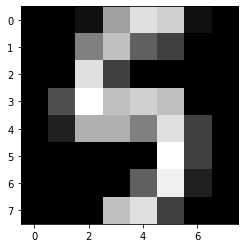

Yo creo que este digito sea: 4


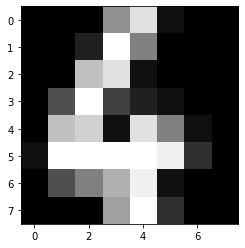

Yo creo que este digito sea: 2


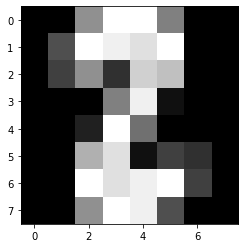

Yo creo que este digito sea: 7


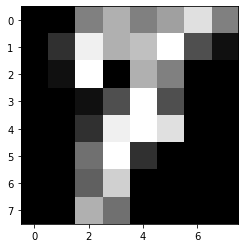

Yo creo que este digito sea: 0


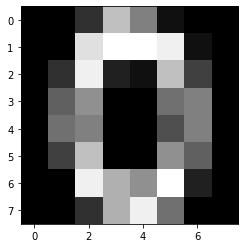

In [25]:
# Haciendo predicciones con el modelo entrenado usando datos de teste, y graficando
for i in np.random.randint(0, high=len(test_labels), size=(5,)):
    
    # Obtenemos una imagen y hacemos la prevision
    image = test_data_norm[i]
    prediction = finalModel.predict([image])[0]
    
    # Plotamos la prevision
    imgdata = np.array(image + data_norm, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels, cmap='gray')
    print(f"Yo creo que este digito sea: {prediction}")
    plt.show()

## Predicciones en Nuevos Datos con el Modelo Entrenado

In [26]:
# Definiendo un nuevo dígito (datos de entrada)
nuevoDigito = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [27]:
# Normalizando o novo dígito
nuevoDigito_norm = nuevoDigito - data_norm

In [28]:
# Haciendo la prediccion con el modelo entrenado
nueva_prediccion = finalModel.predict([nuevoDigito_norm])

Yo creo que este digito sea: [6]


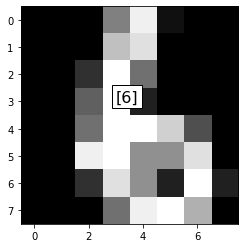

In [29]:
# Previsão do modelo
imgdata = np.array(nuevoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(nueva_prediccion,(3,3), bbox={'facecolor':'white'},fontsize=16)
print(f"Yo creo que este digito sea: {nueva_prediccion}")
plt.show()

In [30]:
# Definiendo un nuevo dígito (datos de entrada)
nuevoDigito = [0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]

In [31]:
# Normalizando o novo dígito
nuevoDigito_norm = nuevoDigito - data_norm

In [32]:
# Haciendo la prediccion con el modelo entrenado
nueva_prediccion = finalModel.predict([nuevoDigito_norm])

Yo creo que este digito sea: [1]


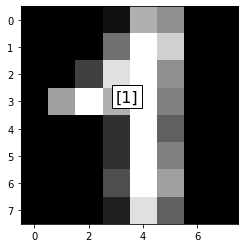

In [33]:
# Previsão do modelo
imgdata = np.array(nuevoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(nueva_prediccion,(3,3), bbox={'facecolor':'white'},fontsize=16)
print(f"Yo creo que este digito sea: {nueva_prediccion}")
plt.show()

## Guardar y Cargar el Modelo usando Pickle

Una vez que el modelo alcanzoo el nivel de precision requerido podeis guardarlo y alimentar la aplicacion objectiva.

In [34]:
# Guardar el modelo
import pickle

# with open('finalized_model', 'wb') as f:
#     pickle.dump(finalModel, f)
    
    
filename = 'finalized_model'
pickle.dump(finalModel, open(filename, 'wb'))

In [35]:
# Cargar el modelo
model = pickle.load(open('finalized_model', 'rb'))

In [36]:
# Haciendo la prediccion con el modelo entrenado
nueva_prediccion = model.predict([nuevoDigito_norm])

Yo creo que este digito sea: [1]


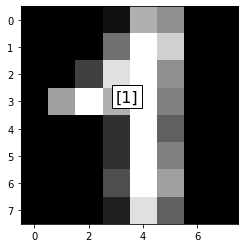

In [37]:
# Previsão do modelo
imgdata = np.array(nuevoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(nueva_prediccion,(3,3), bbox={'facecolor':'white'},fontsize=16)
print(f"Yo creo que este digito sea: {nueva_prediccion}")
plt.show()

## FIN